In [556]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [557]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Reset warnings to default behavior
warnings.resetwarnings()

In [558]:
#read the file
df = pd.read_csv('who_data.csv')

In [559]:
#examine the dataframe
df

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Exploratory Data Analysis

In [560]:
#check for duplicate rows
df.duplicated().sum()

24

In [561]:
#check for null values
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    0
dtype: int64

In [562]:
#function that will itrate through the coulmns and print the value_counts
def value_count(column):
    for col in column:
        print(df[col].value_counts())
        print("----------------------")

In [563]:
#call the function
value_count(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss','working_hours_per_week', 'native_country', 'salary'])

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
----------------------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
----------------------
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64
----------------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-

In [565]:
#summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education_no_of_years   32561 non-null  int64 
 5   marital_status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   relationship            32561 non-null  object
 8   race                    32561 non-null  object
 9   sex                     32561 non-null  object
 10  capital_gain            32561 non-null  int64 
 11  capital_loss            32561 non-null  int64 
 12  working_hours_per_week  32561 non-null  int64 
 13  native_country          32561 non-null  object
 14  salary                  32561 non-null  object
dtypes:

In [566]:
# checking the unique values of the target variable. this can also give insight into the type of model to build
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [567]:
#function to check the data type of all the variables
def dtype(column):
    for col in column:
        print(col)
        print(df[col].dtypes)
        print(f'------------------------------')

In [568]:
#call the function
dtype(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss','working_hours_per_week', 'native_country', 'salary'])

age
int64
------------------------------
workclass
object
------------------------------
fnlwgt
int64
------------------------------
education
object
------------------------------
education_no_of_years
int64
------------------------------
marital_status
object
------------------------------
occupation
object
------------------------------
relationship
object
------------------------------
race
object
------------------------------
sex
object
------------------------------
capital_gain
int64
------------------------------
capital_loss
int64
------------------------------
working_hours_per_week
int64
------------------------------
native_country
object
------------------------------
salary
object
------------------------------


In [569]:
df.describe() #simple statistics

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Replace the " ?" in the columns with "Unknown"

### occupation

In [570]:
df['occupation'].replace(' ?', 'np.Nan', inplace = True) # replace ' ?' with nan

In [571]:
df['occupation'].replace('np.Nan', 'Unknown', inplace = True) # replace 'nan' with Unknown

In [572]:
df['occupation'].value_counts() #sanity check

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
Unknown               1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

### native_country

In [573]:
df['native_country'].replace(' ?', 'np.Nan', inplace = True)  # replace ' ?' with nan

In [574]:
df['native_country'].replace('np.Nan', 'Unknown', inplace = True)  # replace 'nan' with Unknown

In [575]:
df['native_country'].value_counts() #sanity check

 United-States                 29170
 Mexico                          643
Unknown                          583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

### workclass

In [576]:
df['workclass'].replace(' ?', 'np.Nan', inplace = True)  # replace ' ?' with nan

In [577]:
df['workclass'].replace('np.Nan', ' Unknown', inplace = True)  # replace ' ?' with'Unknown'

In [578]:
df['workclass'].value_counts() #sanity check

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 Unknown              1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [579]:
#function to check for empty strings across the columns to ensure we didnt miss it
def check_empty_strings(column):
    for col in column:
        if df[col].astype(str).str.strip().eq('').any():
            print(f'Empty strings present in column {col}')
        else:
            print(f'Empty strings absent in column {col}')
        print(f'------------------------------')

In [580]:
#call the check empty string function
check_empty_strings(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss','working_hours_per_week', 'native_country', 'salary'])

Empty strings absent in column age
------------------------------
Empty strings absent in column workclass
------------------------------
Empty strings absent in column fnlwgt
------------------------------
Empty strings absent in column education
------------------------------
Empty strings absent in column education_no_of_years
------------------------------
Empty strings absent in column marital_status
------------------------------
Empty strings absent in column occupation
------------------------------
Empty strings absent in column relationship
------------------------------
Empty strings absent in column race
------------------------------
Empty strings absent in column sex
------------------------------
Empty strings absent in column capital_gain
------------------------------
Empty strings absent in column capital_loss
------------------------------
Empty strings absent in column working_hours_per_week
------------------------------
Empty strings absent in column native_countr

In [584]:
#drop the duplicates to avoid overfitting
df.drop_duplicates(inplace=True)

In [585]:
#sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32537 non-null  int64 
 1   workclass               32537 non-null  object
 2   fnlwgt                  32537 non-null  int64 
 3   education               32537 non-null  object
 4   education_no_of_years   32537 non-null  int64 
 5   marital_status          32537 non-null  object
 6   occupation              32537 non-null  object
 7   relationship            32537 non-null  object
 8   race                    32537 non-null  object
 9   sex                     32537 non-null  object
 10  capital_gain            32537 non-null  int64 
 11  capital_loss            32537 non-null  int64 
 12  working_hours_per_week  32537 non-null  int64 
 13  native_country          32537 non-null  object
 14  salary                  32537 non-null  object
dtypes:

In [587]:
#create a copy of the dataframe 
dfc = df.copy()

## Model Building

In [588]:
#import a label encoder for the target variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# encode a categorical column
dfc['salary_encoded'] = le.fit_transform(dfc['salary'])

# print the mapping between original and encoded values
print(dict(zip(le.classes_, le.transform(le.classes_))))

{' <=50K': 0, ' >50K': 1}


Target variable didvided into classes
' <=50K': 0, ' >50K': 1

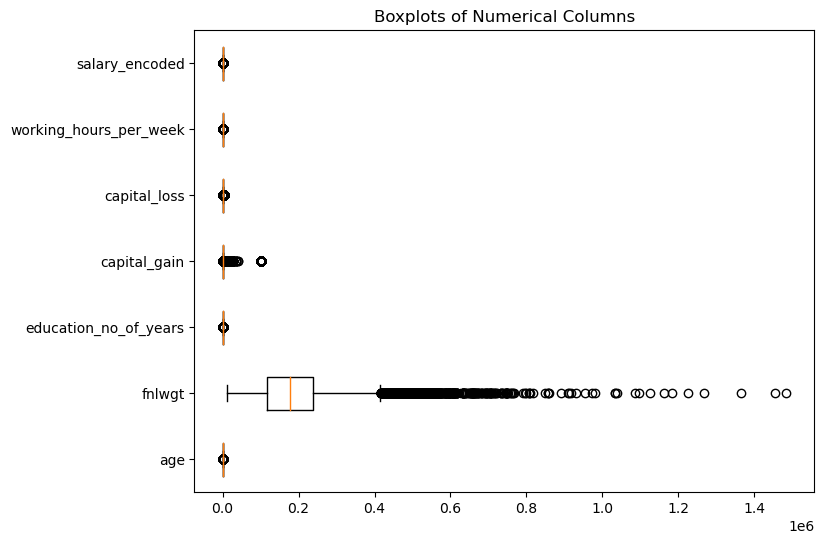

In [589]:
# select only numerical columns
numerical_colsA = ['age', 'fnlwgt', 'education_no_of_years', 'capital_gain', 'capital_loss', 'working_hours_per_week', 'salary_encoded']
dfc_numerical = dfc[numerical_colsA]

# create boxplots for numerical columns
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(dfc_numerical.values, vert=False, labels=dfc_numerical.columns)
ax.set_title('Boxplots of Numerical Columns')
plt.show()

In [590]:
#seperating into different variables to enhance data manipulation
import matplotlib.pyplot as plt

categorical_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'salary']
numerical_cols = ['age', 'fnlwgt', 'education_no_of_years', 'capital_gain', 'capital_loss', 'working_hours_per_week']
outlier_col = ['age', 'fnlwgt', 'education_no_of_years', 'working_hours_per_week']
numerical_cols2 =  ['capital_gain', 'capital_loss']

the outliers to be treated excluded capital_gain and caital_loss because the outlier treatment resulted in the complete clipping of those 2 columns to 0

In [594]:
#treat outliers
def treat_outliers(dfc, col):
    """
    treat outliers
    col = parameter in the functon that represents the columns
    df_clean = dataframe
    
    """
    Q1 = dfc[col].quantile(0.25) #25th quantile
    Q3 = dfc[col].quantile(0.75) #upper quantile
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    dfc[col] = np.clip(dfc[col], lower_whisker, upper_whisker)
    return dfc

def treat_all_outliers(dfc, col_list):
    for c in col_list:
        dfc = treat_outliers(dfc, c)
    return dfc

In [595]:
#call the function
dfc = treat_all_outliers(dfc, outlier_col)

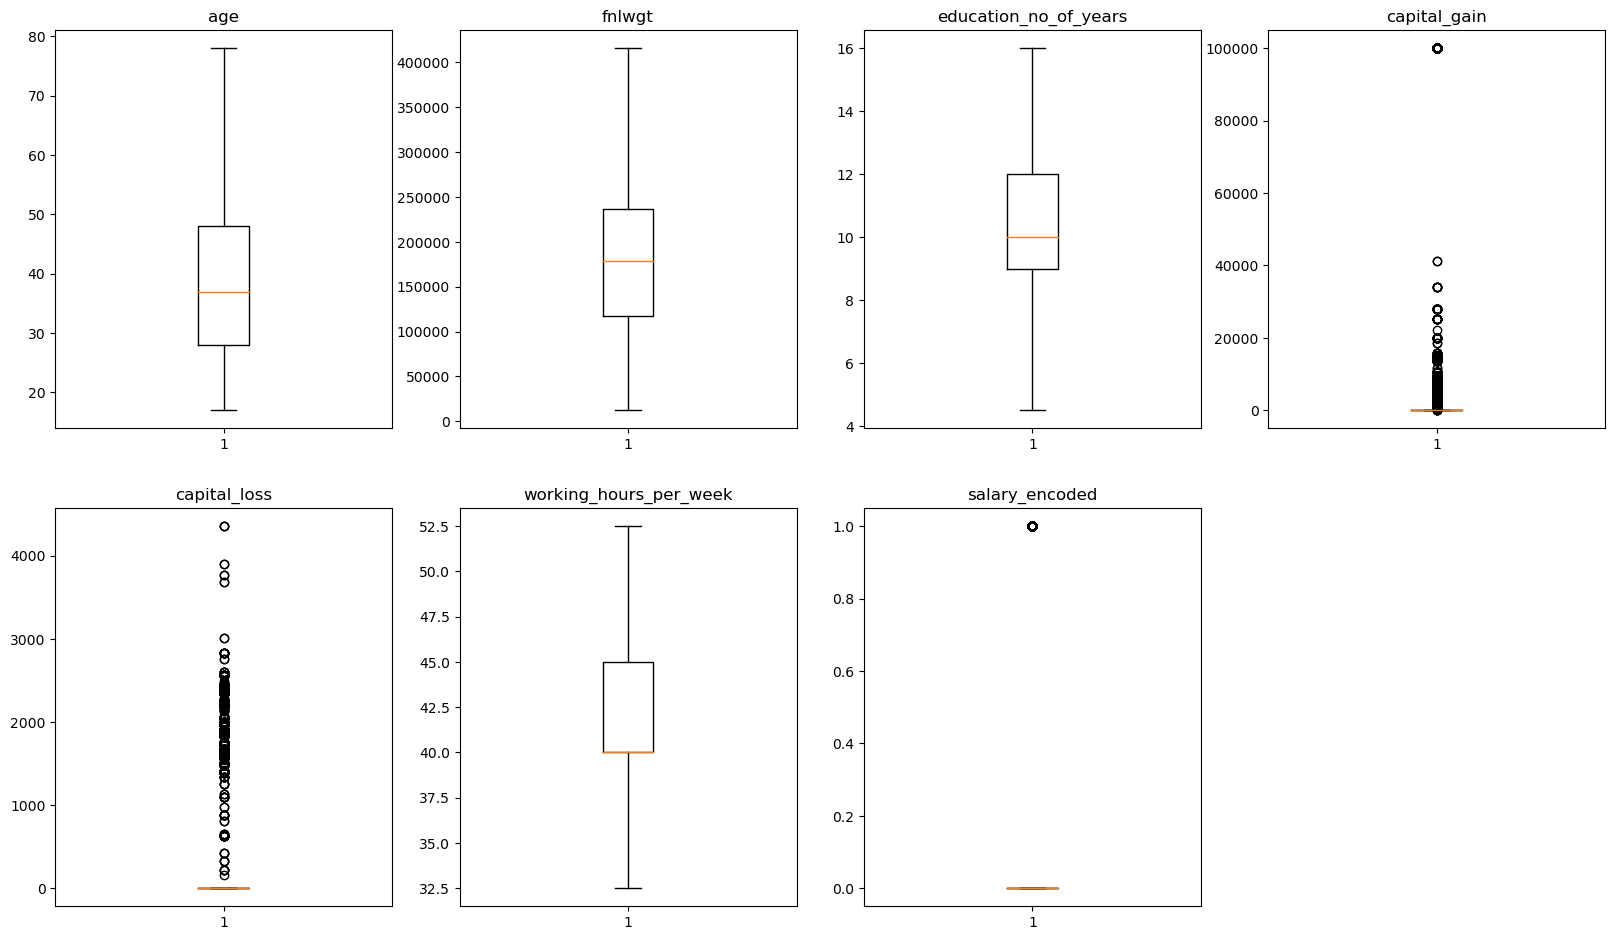

In [596]:
#Sanity check
plt.figure(figsize = (20,30))
numerical_colsB = ['age', 'fnlwgt', 'education_no_of_years', 'capital_gain', 'capital_loss', 'working_hours_per_week', 'salary_encoded']

for i, variable in enumerate(numerical_colsB):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(dfc[variable])
    plt.title(variable)

In [597]:
#Visulize the different classes of the target variable
from utils import labeled_barplots

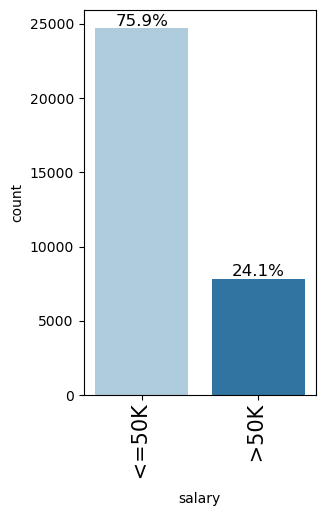

In [598]:
#call the function
labeled_barplots(data = dfc, feature = 'salary', perc = True)

### Identify correlation in data

In [550]:
#check for correlation
df.corr(numeric_only = True)

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
education_no_of_years,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
capital_gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
capital_loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
working_hours_per_week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


<Axes: >

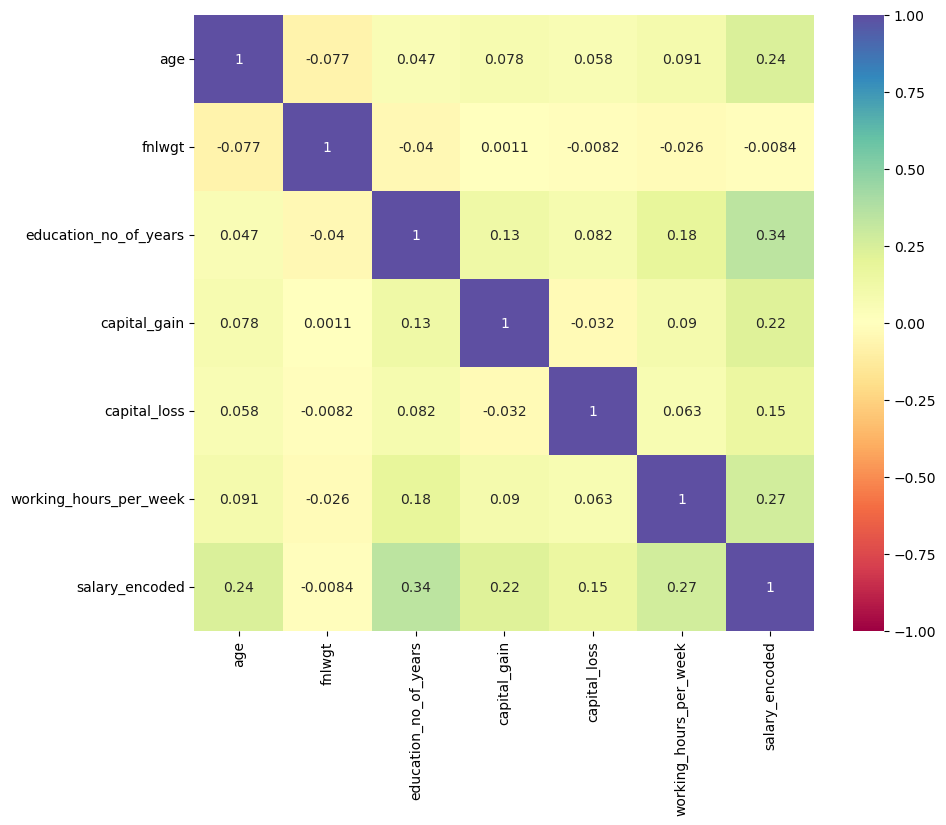

In [599]:
#visualize the correlation
mat_corr = dfc.corr(numeric_only = True)
plt.figure(figsize = (10, 8))
sns.heatmap(mat_corr, annot = True, vmin = -1, vmax = 1, cmap = 'Spectral')

In [600]:
#value_count
dfc['salary_encoded'].value_counts(normalize = True)

0    0.759074
1    0.240926
Name: salary_encoded, dtype: float64

this shows that the data is inbalanced

### Data Preprocessing

In [601]:
#data preprocessing and one hot encoding of all the categorical variables

from sklearn.model_selection import train_test_split

X = dfc.drop('salary_encoded', axis=1)
X = pd.get_dummies(X)
y = dfc['salary_encoded']

In [602]:
#split the data

In [603]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

use stratify = y to make sure that the train and test sets have similar class distributions as the original dataset.

In [606]:
#check split data
y_train.value_counts(normalize= True)

0    0.759076
1    0.240924
Name: salary_encoded, dtype: float64

In [607]:
y_test.value_counts(normalize= True)

0    0.759066
1    0.240934
Name: salary_encoded, dtype: float64

In [612]:
# Scale the data using MinMaxScaler 

In [613]:
from sklearn.preprocessing import MinMaxScaler

In [614]:
scaler = MinMaxScaler()
X_train_sd = scaler.fit_transform(X_train)
X_test_sd = scaler.transform(X_test)


Scaling brings all features to a similar range

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix from X
corr_matrix = X.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [518]:
# build the model

In [615]:
#import Logistic Regression model
from sklearn.linear_model import LogisticRegression

log_reg=  LogisticRegression(random_state = 0, class_weight = {1:0.9, 0:0.1})
log_reg.fit(X_train_sd, y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9}, random_state=0)

In [616]:
# method is used to evaluate the accuracy of a logistic regression model.
log_reg.score(X_train_sd, y_train)

1.0

In [543]:
log_reg.predict(X_test_sd)

array([0, 1, 0, ..., 0, 0, 0])

In [533]:
log_reg.predict_proba(X_test_sd)[:, 1]

array([2.62600525e-03, 9.99430179e-01, 9.45129794e-04, ...,
       9.77547667e-04, 1.11474209e-03, 1.61801664e-03])

In [618]:
# import model performance evaluators libraries
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score

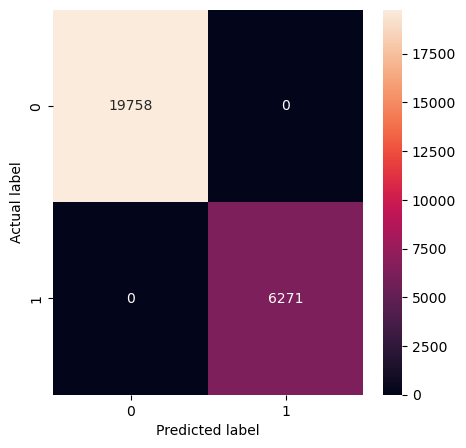

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [619]:
#import utils, a pre-built model
from utils import model_performance_classification
log_reg_train = model_performance_classification(log_reg, X_train_sd, y_train)
log_reg_train

A score of 1.0 for accuracy, recall, precision, and F1-score indicates perfect performance on the classification task. It means that the model achieved 100% accuracy in predicting the correct class labels, correctly identified all instances of the positive class (recall), made no false positive predictions (precision), and achieved a perfect balance between precision and recall (F1-score).

In [ ]:
# checking it on the test set

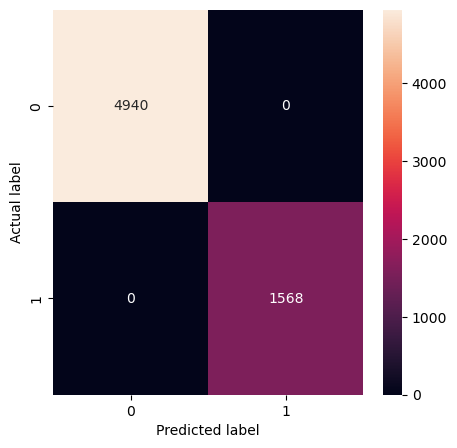

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [621]:
log_reg_test = model_performance_classification(log_reg, X_test_sd, y_test)
log_reg_test

A score of 1.0 for accuracy, recall, precision, and F1-score on the test set suggests that the model performed exceptionally well and achieved perfect classification performance. It means that the model accurately predicted all instances in the test set, correctly identified all instances of the positive class (recall), made no false positive predictions (precision), and achieved a perfect balance between precision and recall (F1-score).

In [624]:
#import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # here you scale the entire dataset, this ensures that the scaling is consistent across all the folds.

# Create a logistic regression model
log_reg = LogisticRegression(max_iter=1000) #Increase the number of iterations (max_iter), you provide the solver with more opportunities to find the optimal weights and achieve convergence.

# Perform cross-validation with scaled data
cv_scores = cross_val_score(log_reg, X_scaled, y, cv=5)

# Print the cross-validation scores and mean accuracy
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0


A cross-validation score of 1.0 (or 100%) indicates that the model achieved perfect accuracy on all folds during cross-validation. This means that the model correctly predicted the target variable for every sample in the dataset.

# Answers

1.) The income of an individual can be influenced by a range of factors including age, workclass, fnlwgt, education, education-num, marital status, occupation, relationship, race, sex, capital gain, capital loss, hours per week, and native country. However, it should be noted that while these factors do contribute to salary differences, their individual impact on income is small.






2.) Yes, the Logistic Regression model which has been adjusted by modifying the class weights to mitigate the impact of the imbalanced target variable.






3.) The model demonstrated outstanding performance with 100% accuracy on both the training and testing datasets. Additionally, during cross-validation, the model consistently achieved a perfect accuracy score of 100%.